In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/sales.csv')
df.dropna(subset=['price'], inplace=True)

In [3]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [4]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

# 1. Model building

<font color='red'>Assignment:</font> Get **luxury** (**price** higher than 500k dollars) as targets, and build a end-to-end model to predict wheather a product is **luxury** using **cost** values.

In [5]:
# Train and test data

features = list(df.columns)
target = ["price", "luxury"]
features = [fea for fea in features if fea not in target]

X_train = train_raw[features]
X_test = test_raw[features]

y_train = train_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)
y_test = test_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)

In [6]:
class Cost_Transformer(object):
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        self.mean = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def cost2num(self, x):
        if type(x) == str: 
            x = x.strip('$').strip('k')
            return float(x)*1000
        else:
            return x

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [8]:
steps = [('ctf', Cost_Transformer()),
         ('rescale', MinMaxScaler()),
         ('logr', LogisticRegression(class_weight='balanced'))]
model = Pipeline(steps)
model = model.fit(train_raw, y_train)

In [9]:
y_train_pred = model.predict(train_raw)
y_test_pred = model.predict(test_raw)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2573
           1       0.28      0.71      0.40       184

    accuracy                           0.86      2757
   macro avg       0.63      0.79      0.66      2757
weighted avg       0.93      0.86      0.88      2757

              precision    recall  f1-score   support

           0       0.97      0.89      0.92       383
           1       0.44      0.76      0.56        46

    accuracy                           0.87       429
   macro avg       0.71      0.82      0.74       429
weighted avg       0.91      0.87      0.89       429



# 2. Probability

## 2.1 Predict_proba

<font color='red'>Assignment:</font> Use the **predict_proba** function of the model to make predictions for the training and testing sets and assign the outputs to variables **y_train_proba** and **y_test_proba**.

In [12]:
y_train_proba = model.predict_proba(train_raw)

In [13]:
y_test_proba = model.predict_proba(test_raw)

<font color='red'>Question:</font> What are the shapes of **y_train_proba** and **y_test_proba**? Why are they different from the outputs obtained with the **predict** function? Which parts of **y_train_proba** and **y_test_proba** should we care about in this case? 

In [14]:
print(y_train_proba.shape)
print(y_test_proba.shape)

(2757, 2)
(429, 2)


In [15]:
model.classes_

array([0, 1], dtype=int64)

In [16]:
y_test_proba

array([[0.66162999, 0.33837001],
       [0.67508952, 0.32491048],
       [0.67508952, 0.32491048],
       [0.66162999, 0.33837001],
       [0.89338056, 0.10661944],
       [0.88365903, 0.11634097],
       [0.89615435, 0.10384565],
       [0.73991718, 0.26008282],
       [0.83948254, 0.16051746],
       [0.66162999, 0.33837001],
       [0.80358939, 0.19641061],
       [0.66162999, 0.33837001],
       [0.66162999, 0.33837001],
       [0.80358939, 0.19641061],
       [0.04875918, 0.95124082],
       [0.41364604, 0.58635396],
       [0.85227839, 0.14772161],
       [0.75656138, 0.24343862],
       [0.66162999, 0.33837001],
       [0.66162999, 0.33837001],
       [0.61447294, 0.38552706],
       [0.80358939, 0.19641061],
       [0.66162999, 0.33837001],
       [0.88861252, 0.11138748],
       [0.56703201, 0.43296799],
       [0.15013482, 0.84986518],
       [0.69624844, 0.30375156],
       [0.66162999, 0.33837001],
       [0.1713027 , 0.8286973 ],
       [0.00433921, 0.99566079],
       [0.

### The output from predict is the values of 0 or 1 while the output of predict_prob has two columns: the first column is the probability of predicting 0, the second column is the probability of predicting 1.
### Most of the time we care about the second column, probability of 1.

<font color='red'>Question:</font> What is the range of the values in **y_train_proba** and **y_test_proba**? What do the values mean?

In [17]:
import numpy as np

print('The range of y_train_proba is: (', np.min(y_train_proba), ',', np.max(y_train_proba), ')')

The range of y_train_proba is: ( 0.0009317947071890709 , 0.9990682052928109 )


In [18]:
# correct way
print('The range of y_train_proba is: (', np.min(y_train_proba[:,1]), ',', np.max(y_train_proba[:,1]), ')')

The range of y_train_proba is: ( 0.09337985566062992 , 0.9990682052928109 )


In [19]:
print('The range of y_test_proba is: (', np.min(y_test_proba), ',', np.max(y_test_proba), ')')

The range of y_test_proba is: ( 0.004339213460594404 , 0.9956607865394056 )


In [20]:
# correct way
print('The range of y_test_proba is: (', np.min(y_test_proba[:,1]), ',', np.max(y_test_proba[:,1]), ')')

The range of y_train_proba is: ( 0.09337985566062992 , 0.9956607865394056 )


## 2.2 Threshold

<font color='red'>Assignment:</font> Plot **y_test_proba** versus **cost** and compare it with the plot of **y_test** versus **cost**.

In [21]:
import matplotlib.pylab as plt
%matplotlib inline

In [22]:
costtrans = Cost_Transformer()

In [23]:
cost = costtrans.fit_transform(test_raw)

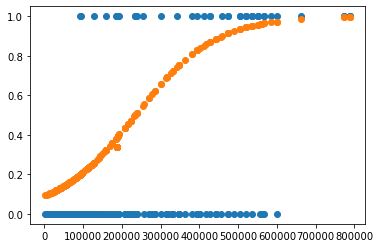

In [24]:
plt.scatter(cost, y_test)
plt.scatter(cost, y_test_proba[:, 1])

<font color='red'>Assignment:</font> Calculate **y_test_pred** using **predict** function. Plot **y_test_proba** versus **cost** and compare it with the plot of **y_test_pred** versus **cost**.

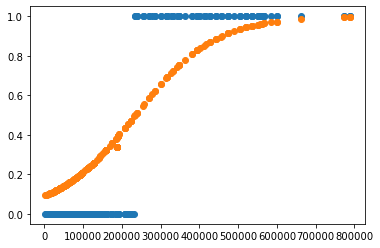

In [25]:
plt.scatter(cost, y_test_pred)
plt.scatter(cost, y_test_proba[:, 1])

<font color='red'>Question:</font> How can we transform **y_test_proba** to **y_test_pred**? What is the default threshold?

### We can transform y_test_proba to y_test_pred by comparing the probabilities with a specified threshold (1 if larger than threshold, otherwise 0). The default threshold is 0.5.

In [26]:
y_test_proba_tfm = np.zeros(len(y_test_proba), dtype=int)
y_test_proba_tfm[y_test_proba[:,0]<=0.5] = 1
np.array_equiv(y_test_proba_tfm, y_test_pred) 

True

<font color='red'>Assignment:</font> Change the threshold value applied in the transformation from **y_test_proba** to **y_test_pred**, and visualize how the threshold value changes **precision**, **recall**, and **f1 score**. 

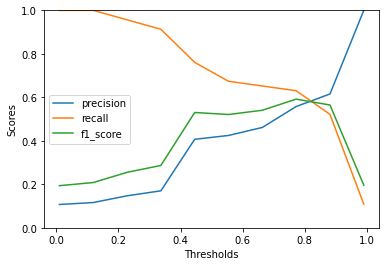

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(0.01,0.99,10)
# thresholds = np.linspace(0, 1, 10)

precision = []
recall = []
f1 = []

for t in thresholds:
    y_test_proba_tfm = np.zeros(len(y_test_proba), dtype=int)
    y_test_proba_tfm[y_test_proba[:,1]>t] = 1
#     y_test_proba_tfm = (y_test_proba[:, 1] > t).astype(int)
    precision.append(precision_score(y_test, y_test_proba_tfm, average=ave))
    recall.append(recall_score(y_test, y_test_proba_tfm, average=ave))
    f1.append(f1_score(y_test, y_test_proba_tfm, average=ave))

plt.plot(thresholds, precision, label = "precision")
plt.plot(thresholds, recall, label = "recall")
plt.plot(thresholds, f1, label = "f1_score")
plt.xlabel('Thresholds')
plt.ylabel('Scores')
plt.ylim([0,1])
plt.legend()
plt.show()

**Answer:** As the threshold increases, precision for positive prediction increases, recall decreases, and f1 score first increases and then decreases. This makes sense because the higher the threshold, the higher probability is required to label a sample as True, so fewer and fewer samples are going to be labeled true, decreasing both TP and FP, increasing precision but lowering recall.

<font color='red'>Question:</font> What threshold value would you like to choose? How do we decide which threshold to choose? Could you provide some examples?

### I would choose 0.8-0.85 (cross point). It's the optimal choice based on all three scores.

Because there is always a tradeoff between precision and recall, one needs to choose the threshold by weighting the tradeoff according to their practical insight into the field of application.

For example, if the model is for screening cancer (not for invasive treatment), you might prioritize recall over precision because you don't want to miss the opportunity to treat the disease as early as possible. <br>
At the other end of the spectrum you have a situation where precision is more important than recall. You would like to have less False Positives in trade off to have more False Negatives. Meaning, getting a False Positive is very costly, and a False Negative is not as much. Say you need to predict whether a capital project is worth investing or not. It is ok to miss a good opportunity as projects come and go, but you really don't want to make a substantial investment on bad projects.

<font color='red'>Question:</font> Is the threshold a hyper parameter? What kind of dataset should we use to find the threshold?

### The threshold is not a hyper parameter. It does not change the result of the prediction. It only changes how to define yes or no. 
### Train dataset

## 2.3 ROC AUC

<font color='red'>Assignment:</font> Calculate the train and test **roc_auc_score**s. 

In [35]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score for the train set: {0:.3f}'.
      format(roc_auc_score(y_train, y_train_proba[:, 1])))
print('roc_auc_score for the test set: {0:.3f}'.
      format(roc_auc_score(y_test, y_test_proba[:, 1])))

roc_auc_score for the train set: 0.854
roc_auc_score for the test set: 0.879


<font color='red'>Question:</font> What do **ROC** and **AUC** stand for? 

### ROC stands for Receiver Operating Characteristics and AUC stands Area Under Curve.

- ROC curves make it easy to identify the best threshold for making a decision.
- AUC can help decide which classification method is better.

<font color='red'>Assignment:</font> Plot the ROC curve of test scores, use the **roc_curve** module in sklearn to obtain relevant data. 

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thres = roc_curve(y_test, y_test_proba[:,1], pos_label=1)

In [39]:
print(fpr.shape)
print(tpr.shape)
print(thres.shape)

(86,)
(86,)
(86,)


In [40]:
thres

array([1.99566079, 0.99566079, 0.99492627, 0.98520242, 0.97313082,
       0.96870245, 0.96357154, 0.9614459 , 0.95920148, 0.95763625,
       0.94341448, 0.93441854, 0.92479332, 0.91310965, 0.89980752,
       0.8971201 , 0.88572377, 0.86883137, 0.85722916, 0.84986518,
       0.83823629, 0.8286973 , 0.80676441, 0.78108498, 0.7530376 ,
       0.74191747, 0.72463646, 0.71071052, 0.69220681, 0.68589483,
       0.6577617 , 0.62156923, 0.60761398, 0.58635396, 0.55508845,
       0.54780149, 0.50866675, 0.50130256, 0.4939378 , 0.47187205,
       0.45478108, 0.43296799, 0.40193406, 0.39487323, 0.38552706,
       0.38088497, 0.36027417, 0.34458791, 0.33837001, 0.32491048,
       0.30375156, 0.28539064, 0.27352768, 0.26008282, 0.24890542,
       0.24343862, 0.23805383, 0.23275151, 0.22753203, 0.21073506,
       0.20587682, 0.20110204, 0.19641061, 0.19180235, 0.18578694,
       0.18137167, 0.16861675, 0.16051746, 0.15529469, 0.15146927,
       0.14772161, 0.14405092, 0.14045642, 0.13693727, 0.13349

Text(0, 0.5, 'True Positive rate')

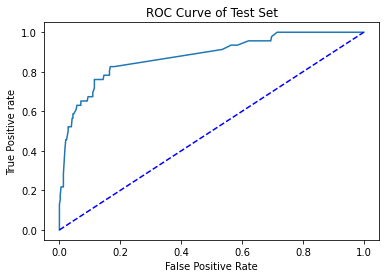

In [37]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve of Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

<font color='red'>Question:</font> What are the x and y axes? 

### The x axes is the false positive rate and the y axes is the true positive rate.

The ROC curve is produced by calculating and plotting the true positive rate against the false positive rate for a single classifier at a variety of thresholds. 
- x axis: false positive rate; calculated as FP/(FP+TN); same as 1-specificity
- y axis: true positive rate; calculated as TP/(TP+FN); same as sensitivy

#### Find the best threshold: top left point : https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293

<font color='red'>Question:</font> What is the range of **roc_auc_score**? What does it mean when **roc_auc_score** is greater than, equal to, or less than 0.5?

### The range is between 0 and 1. 
### When the score is 0, it means the classifier is perfectly incorrect, it is predicting the incorrect choice 100% of the time. If the score is 1, it means the classifier is perfectly correct. If the score is 0.5, it means the predictor makes random guesses.

## 2.4 Log Loss

**Knowledge:** The loss function for logistic regression is called **log loss** or **cross entropy**. 

Difference between loss function and cost  function?: Often used interchangebly. The loss function is associated with every training example, and the cost function is the average value of the loss function over all the training samples.

<font color='red'>Assignment:</font> Calculate the train and test log loss.

In [41]:
from sklearn.metrics import log_loss

print('log loss for the train set: {0:.3f}'.
      format(log_loss(y_train, y_train_proba)))
print('log loss for the test set: {0:.3f}'.
      format(log_loss(y_test, y_test_proba)))

log loss for the train set: 0.459
log loss for the test set: 0.473


<font color='red'>Question:</font> Which of these following terms are sensitive to base rates: **log loss**, **ROC AUC**, and **threshold**?

### log loss, because when your data is imbalanced, the minority class samples will be treated as noise, therefore log loss is sensitive to the base rate (contribution/penalty from the minority class is low, thus need to balance class_weight)
### threshold as well...
### ROC_AUC, very different from others. It tries to tell you if this model is capable to distinguish positive class from negative class. Insensitive to base rate or threshold. 

<font color='red'>Question:</font> If you are assigned to build a classification model to help increasing the response rate in direct mail marketing, what will be the target for you model? Which metrics will you use to evaluate the performance of your model?

### Target: The probability of whether or not the customer will respond.
### Metrics: Use ROC AUC to compare different models; then use Precision or Recall depending on specific business needs.

# 3. Correlation between features and target

<font color='red'>Assignment:</font> Plot the distributions of **cost** values for positive and negative **luxury** items, respectively, in one figure. Use the data in the training set.

In [43]:
# Plot cost distribution

data = {
    "cost": model[0].transform(X_train)["cost"],
    "luxury": train_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)
}
cost_by_lux = pd.DataFrame(data).groupby("luxury")

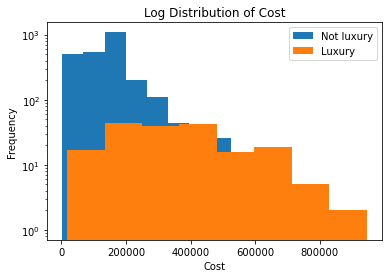

In [44]:
len_0 = len(cost_by_lux.get_group(0))
len_1 = len(cost_by_lux.get_group(1))
n_bins_0 = 1 + int(np.log2(len_0))
n_bins_1= 1 + int(np.log2(len_1))

plt.hist(cost_by_lux.get_group(0)["cost"], log=True, label="Not luxury", bins=n_bins_0)
plt.hist(cost_by_lux.get_group(1)["cost"], log=True, label="Luxury", bins=n_bins_1)
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.title("Log Distribution of Cost")
plt.legend(loc="best")
plt.show()

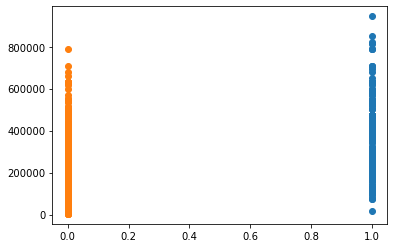

In [46]:
# not a good example
costtrans = Cost_Transformer()
cost = costtrans.fit_transform(train_raw)
ind_1 = np.where(y_train == 1)
ind_0 = np.where(y_train == 0)
plt.scatter(np.ones(len(ind_1[0])), [cost.values[i] for i in ind_1])
plt.scatter(np.zeros(len(ind_0[0])), [cost.values[i] for i in ind_0])

<AxesSubplot:xlabel='price', ylabel='cost'>

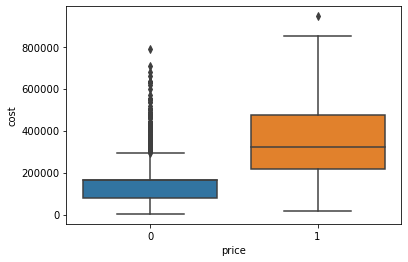

In [52]:
import seaborn as sns
costtrans = Cost_Transformer()
cost = costtrans.fit_transform(train_raw)
cost_price = pd.concat([cost, y_train], axis=1)

sns.boxplot(x='price', y='cost', data=cost_price)

#### <font color='red'>Note:</font> luxury defined by price, not cost; here cost is a feature.

<font color='red'>Question:</font> From the above figure, can you tell how good **cost** is a predictor for luxury?

### As the cost ditribution of non-luxury samples is skewed to low cost, while cost of luxury samples is centered at medium cost. These two classes are decently seperated by cost, thus cost is a good predictor for luxury.

#### <font color='red'>Note:</font> this is a very good analysis for classification problems, to check if a feature is a good indicator or not

**Example:** Mannualy calculate the ROC AUC score of cost predictor. We can use this method to estimate the importance of a feature, before we use it in a model.

In [53]:
# preparation
train = Cost_Transformer().fit_transform(train_raw)
train['price'] = y_train
train.head()

,cost,price
0,333000.000000,0
1,166184.183143,0
2,270000.000000,0
4,97000.000000,0
5,59000.000000,0


In [54]:
# number of positive data points
num_pos = sum(train.price)
# number of negative data points
num_neg = len(train) - num_pos
# thresholds
ths = sorted(list(train.cost.unique()))

In [55]:
tprs = []
fprs = []
auc = 0.0
tpr0 = 1.0
fpr0 = 1.0
for th in ths:
    # true positive rates
    true_pos = sum(train[train['cost'] >= th]['price'])
    tpr = true_pos / num_pos
    tprs.append(tpr)
    
    # false positive rates
    false_pos = sum(train['cost'] >= th) - true_pos
    fpr = false_pos / num_neg
    fprs.append(fpr)
    
    # area under curve
    auc += (fpr0 - fpr) * (tpr0 + tpr)/2.0
    fpr0 = fpr
    tpr0 = tpr
    

Text(0, 0.5, 'true positive rate')

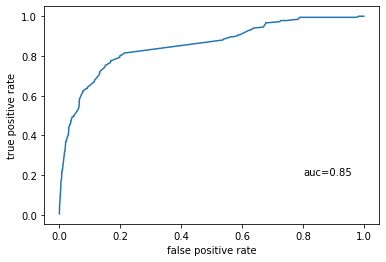

In [56]:
plt.plot(fprs, tprs)
plt.text(0.8, 0.2, 'auc={0:.2f}'.format(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')